# ![.right](https://lh6.ggpht.com/wUrTIhpHPVqw_VPCdhbSiF5TXlBlLyRHdH1gsII_y5NkgYKzbbj7cC2l6AGoVq-JN0U=w100 "MSDS 7331 Data Mining - Project 1")


# Project 2: Classification

---



# Team Members

- Chris Woodard
- Claire Chu
- Nathan Mowat
- Bill Kerneckel

---


# Rubic

- [Data Preperation 1](#dp1) 

- [Data Preperation 2](#dp2)

- [Modeling and Evaluation 1](#me1)

- [Modeling and Evaluation 2](#me2)

- [Modeling and Evaluation 3](#me3)

- [Modeling and Evaluation 4](#me4)

- [Modeling and Evaluation 5](#me5)

- [Modeling and Evaluation 6](#me6)

- [Deployment](#d)

- [Exceptional Work](#ew)

- [Appendix](#a)

<hr>



# OBJECTIVE: 
Using the NASA human resources dataset, let's use the variables to predict future records:
- what kind of model can we use to predict a "junior salary range level" classification, given the variables we have
- what kind of model can we use to predict a "caucasian" race classification, given the variables we have

# Data Preperation 1

---

10 Points - Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

In [106]:
#load python libaries
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as pl
import seaborn as sns
import glob
import sys
import os
import warnings
import ggplot
import datetime
import time
from datetime import date

In [107]:
%matplotlib inline

In [4]:
#load data file
data_file = pd.read_excel('NEW_NASA_2006.xlsx') 
data_file2 = pd.read_excel('NEW_NASA_2007.xlsx') 
data_file3 = pd.read_excel('NASA_2008.xlsx')
data_file4 = pd.read_excel('NASA_2009.xlsx')
data_file5 = pd.read_excel('NASA_2010.xlsx')
data_file6 = pd.read_excel('NASA_2011.xlsx')
data_file7 = pd.read_excel('NASA_2012.xlsx')
data_file8 = pd.read_excel('NASA_2013.xlsx')
data_file9 = pd.read_excel('NASA_2014.xlsx')
data_file10 = pd.read_excel('NASA_2015.xlsx')
data_file11 = pd.read_excel('NASA_2016.xlsx')

#you'll have to change the file path to your working directory

#removing 1st row from datasets
data_file.drop(0, axis = 0,inplace = True)
data_file2.drop(0, axis = 0,inplace = True)
data_file3.drop(0, axis = 0,inplace = True)
data_file4.drop(0, axis = 0,inplace = True)
data_file5.drop(0, axis = 0,inplace = True)
data_file6.drop(0, axis = 0,inplace = True)
data_file7.drop(0, axis = 0,inplace = True)
data_file8.drop(0, axis = 0,inplace = True)
data_file9.drop(0, axis = 0,inplace = True)
data_file10.drop(0, axis = 0,inplace = True)
data_file11.drop(0, axis = 0,inplace = True)

#note: please be patient as this will take a few minutes to run

In [65]:
#combining dataframes 
df = [data_file, data_file2, data_file3, data_file4, data_file5, data_file6, data_file7, data_file8, data_file9, data_file10, data_file11]

cdf = pd.concat(df, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
cdf.reset_index()

,index,Hist_yr,Unnamed: 28,agency,bdyr,coopsch,coopyr,currgrddte,dtystn_ind,dtystnname,...,sex,step_emp,supind,suplev,tenure,time_in_grade,tl,ttl,typappt,worksch
0,1,2006,NaN,NN51,1900,NaN,NaN,10/08/1989,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",...,F,9,8,34,1,205.46,NaN,NaN,10,F
1,2,2006,NaN,NN51,1980,NaN,NaN,09/22/2002,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",...,F,6,2,26,1,50.00,NaN,NaN,10,F
2,3,2006,NaN,NN23,1986,NaN,NaN,07/21/1996,88,"HAMPTON,HAMPTON,VIRGINIA",...,M,8,8,34,1,124.04,NaN,NaN,10,F
3,4,2006,NaN,NN64,1994,NaN,NaN,04/17/2005,88,"STENNIS SPACE CENTER, HANCOCK, MISSISSIPPI",...,M,2,2,26,1,19.17,NaN,NaN,10,F
4,5,2006,NaN,NN72,2006,NaN,NaN,07/23/2006,29,"HOUSTON,HARRIS,TEXAS",...,F,10,8,34,3,3.98,NaN,NaN,20,F
5,6,2006,NaN,NN62,1972,NaN,NaN,12/01/1997,32,"REDSTONE ARSENAL,MADISON,ALABAMA",...,M,6,8,34,1,107.69,NaN,NaN,10,F
6,7,2006,NaN,NN51,1900,NaN,NaN,02/27/2000,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",...,M,5,8,34,1,80.85,NaN,NaN,10,F
7,8,2006,NaN,NN72,1986,NaN,NaN,04/26/1998,29,"HOUSTON,HARRIS,TEXAS",...,M,6,8,34,1,102.88,NaN,NaN,10,F
8,9,2006,NaN,NN51,1978,NaN,NaN,09/27/1987,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",...,M,0,2,32,1,229.85,NaN,NaN,10,F
9,10,2006,NaN,NN10,1987,NaN,NaN,05/14/2006,80,"WASHINGTON,DISTRICT OF COLUMBIA",...,F,6,2,34,1,6.27,NaN,NaN,10,F


In [66]:
# dropping columns we are not using for the analysis
cdf.drop('Unnamed: 28', axis=1, inplace=True)
cdf.drop('agency', axis=1, inplace=True)
cdf.drop('coopsch', axis=1, inplace=True)
cdf.drop('coopyr', axis=1, inplace=True)
cdf.drop('dtystn_ind', axis=1, inplace=True)
cdf.drop('dtystnname', axis=1, inplace=True)
cdf.drop('edlev', axis=1, inplace=True)
cdf.drop('foulev', axis=1, inplace=True)
cdf.drop('fousch', axis=1, inplace=True)
cdf.drop('fouyr', axis=1, inplace=True)
cdf.drop('nasattl', axis=1, inplace=True)
cdf.drop('nasa', axis=1, inplace=True)
cdf.drop('nasat', axis=1, inplace=True)
cdf.drop('probenddte', axis=1, inplace=True)
cdf.drop('promontedte', axis=1, inplace=True)
cdf.drop('secsch', axis=1, inplace=True)
cdf.drop('seclev', axis=1, inplace=True)
cdf.drop('typappt', axis=1, inplace=True)
cdf.drop('tl', axis=1, inplace=True)
cdf.drop('ttl', axis=1, inplace=True)
cdf.drop('worksch', axis=1, inplace=True)

In [67]:
cdf = cdf[cdf.bdyr != 1900]
cdf.salary = cdf.salary.astype(np.float64)
cdf.time_in_grade = cdf.time_in_grade.astype(np.float64)
cdf.suplev = cdf.suplev.astype(np.float64)

In [68]:
# converting bdyr column to age
#now = datetime.datetime.now()
now = date(2016,12,31)
cdf['bdyr'] = cdf['bdyr'].apply(pd.to_numeric, errors='coerce') 
cdf['age'] = now.year - cdf['bdyr']

In [69]:
cdf['salary_range'] = pd.cut(cdf['salary'],[0,50000,100000,135000,150000],4,labels=['Entry_Level','Jr_Level','Mid_Level', 'Mgmt_Level'])
print(cdf['salary_range'].head())
cdf.dropna(inplace=True)

1     Jr_Level
2    Mid_Level
3     Jr_Level
4    Mid_Level
5     Jr_Level
Name: salary_range, dtype: category
Categories (4, object): [Entry_Level < Jr_Level < Mid_Level < Mgmt_Level]


In [70]:
cdf.salary.max() #Is the salary range cut-off still valid with the new data? Yes

149993.0

In [71]:
# convert cdf variable back to "df" nomenclature
df = pd.DataFrame(cdf)

In [72]:
#manipulate employee start date 'eoddte' to get 'service' variable
#convert 'eoddte' to series
df.eod = pd.Series(df['eoddte'])
#convert 'eoddte' series to 'eoddte' datetime
df['eoddte'] = pd.to_datetime(df.eod) 
#convert eod to be just the year
df['eodyr'] = df['eoddte'].map(lambda x: x.year)

In [73]:
#convert high school graduation year "hiyr" to be numeric
df['hiyr'] = df['hiyr'].apply(pd.to_numeric, errors='coerce')
#after looking at a crosstab, we can see that there are a lot of "high school graduation year: 0"
#this is a data entry error, let's remove these entries...
df = df[df.hiyr != 0]
pd.crosstab(index=df["hiyr"],columns="hiyr")
#now the 0 entries have been removed

#subtract employee hire date from high school graduation date to get exprience
df['experience'] = df['eodyr'] - df['hiyr']

In [74]:
#get the 'service' variable by subtracting current date from hire date
today = date(2016, 12, 31)

df['service'] = today - df['eoddte']
#generate retirement potential by subtracting retirement eligibility date from todays date  
#convert retoptdte to series for conversion to datetime format
df.retoptdte = pd.Series(df['retoptdte'])
#convert 'retoptdte' series to 'eoddte' datetime
df['retoptdte'] = pd.to_datetime(df.retoptdte) 
#generate 'retpot' variable
df['retpot'] = today - df['retoptdte']

In [75]:
df_grouped = df.groupby(by=['grade','sex'])

In [76]:
df_grouped = df.groupby(by=['grade','sex'])
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df_imputed[['grade','sex']] = df[['grade','sex']]

In [77]:
df['Hist_yr'] = df['Hist_yr'].astype(np.float64)
df_yrgroup = df.groupby(by=['Hist_yr'])

In [145]:
# creating new dataframe. Keeping original seperate.
DF_NoT = df.copy()
# perform one-hot encoding of the categorical data "salary_range" and "rno" (ethnic background).
tmp_df = pd.get_dummies(df.salary_range,prefix='salary_range')
tmp_df2 = pd.get_dummies(df.rno,prefix='rno')

DF_NoT = pd.concat((df,tmp_df),axis=1) # add back into the dataframe
DF_NoT = pd.concat((DF_NoT,tmp_df2),axis=1)

In [146]:
# Delete time/dates - can't be used in L-Regression
DF_NoT = DF_NoT.drop(['eoddte','retoptdte','salary_range', 'currgrddte', 'frscdte', 'fscdte', 'hisch', 'leqdte',
                     'loccde','ncc', 'opmtitle', 'occode', 'orga', 'orgabr', 'orgadir', 'orgadiv',  'orgasec', 
                     'postenure', 'tenure', 'supind', 'suplev', 'rno', 'rno_000010', 'rno_100100', 'rno_100001', 
                     'rno_100010', 'rno_100101', 'rno_100000', 'rno_011000', 'rno_001101', 'rno_010001', 'rno_010101',
                     'rno_001100', 'rno_010000', 'rno_010100', 'rno_001001', 'rno_001000', 'rno_000101', 'rno_000100',
                     'rno_000011', 'rno_101000', 'rno_101101', 'rno_110000', 'rno_110001', 'rno_110101', 'rno_111111',
                     'rno_10', 'rno_11', 'rno_100', 'rno_101', 'rno_1000', 'rno_1001', 'rno_1100', 'rno_1101', 'rno_10000',
                     'rno_10001', 'rno_10100', 'rno_10101', 'rno_101100', 'rno_000000', 'rno_000110', 'rno_000111', 
                     'rno_001010', 'rno_001011', 'rno_010111', 'rno_011001', 'rno_011100', 'rno_011101', 'rno_100011', 
                      'rno_101001', 'rno_1'], axis=1)

In [147]:
today = date(2016, 12, 31) #modify if more datasets are added
DF_NoT.service = DF_NoT.service / np.timedelta64(1, 'D')
DF_NoT.retpot = DF_NoT.retpot / np.timedelta64(1, 'D')



In [148]:
DF_NoT.lastpromodte = pd.Series(DF_NoT['lastpromodte'])
#convert 'eoddte' series to 'eoddte' datetime
DF_NoT['lastpromodte'] = pd.to_datetime(DF_NoT.lastpromodte) 
DF_NoT['lastpromodte'] = today - DF_NoT['lastpromodte']

#removing the day to calculate a number
DF_NoT.lastpromodte = DF_NoT.lastpromodte / np.timedelta64(1, 'D')

DF_NoT.nextwigdte = pd.Series(DF_NoT['nextwigdte'])
DF_NoT['nextwigdte'] = pd.to_datetime(DF_NoT.nextwigdte) 
DF_NoT['nextwigdte'] = today - DF_NoT['nextwigdte']
DF_NoT.nextwigdte = DF_NoT.nextwigdte / np.timedelta64(1, 'D')

DF_NoT.retdiscdte = pd.Series(DF_NoT['retdiscdte'])
DF_NoT['retdiscdte'] = pd.to_datetime(DF_NoT.retdiscdte) 
DF_NoT['retdiscdte'] = today - DF_NoT['retdiscdte']
DF_NoT.retdiscdte = DF_NoT.retdiscdte / np.timedelta64(1, 'D')

DF_NoT['IsMale'] = DF_NoT.sex=='M' 
DF_NoT.IsMale = DF_NoT.IsMale.astype(np.int)
del DF_NoT['sex']

# Data Preperation 2
---


5 Points - Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [150]:
DF_NoT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126967 entries, 2 to 17523
Data columns (total 24 columns):
Hist_yr                     126967 non-null float64
bdyr                        126967 non-null float64
grade                       126967 non-null object
hilev                       126967 non-null object
hiyr                        126967 non-null int64
install                     126967 non-null object
lastpromodte                126967 non-null float64
nextwigdte                  126967 non-null float64
retdiscdte                  126967 non-null float64
salary                      126967 non-null float64
secyr                       126967 non-null object
step_emp                    126967 non-null object
time_in_grade               126967 non-null float64
age                         126967 non-null float64
eodyr                       126967 non-null int64
experience                  126967 non-null int64
service                     126967 non-null float64
retpot           

Based on the output above, you can see we have about 126,967 entries with 41 columns. 
New Variables created are:
- the age category derived from the "birth year" variable
- the salary_range category derived by dividing up the salary variable into 4 categories
- the eodyr variable which shows the year of employment
- the experience variable derived from the high school graduation year subtracted from the last date of the data set (12/31/2016)
- the serivce variable derived from the year of employment subtracted from 12/31/2016
- the retirement potential derived from the date of earliest reitrement subtracted from 12/31/2016

Let's use the variables to predict future records in the NASA human resources data set
- which model can we use to predict a "junior salary range level" classification, given the variables we have
- which model can we use to predict a "caucasian" race classification, given the variables we have


# Modeling and Evaluation 1
---

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

# X = create a matrix with all variable except response variable in it. rno_000001
# Y = this should be predictor variable
# create variables we are more familiar with
X = DF2_NoT.as_matrix()
target = len(DF2_NoT.salary_range_Jr_Level)

y = target.as.matric()
yhat = np.zeros(y.shape) # we will fill this with predictions

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN accuracy', total_accuracy)

SyntaxError: invalid syntax (<ipython-input-193-4e0ecf4542b4>, line 10)

10 Points - Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

# Modeling and Evaluation 2
---

10 Points - Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time

# Modeling and Evaluation 3
---

20 Points - Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

# Modeling and Evaluation 4
---

10 Points - Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

# Modeling and Evaluation 5
---

10 Points - Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

# Modeling and Evaluation 6
---

10 Points - Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

# Deployment
---


5 Points - How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

# Exceptional Work
---

Classification Using Gradient Boosting

In [174]:
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [175]:
train = DF_NoT.copy()

In [176]:
target = 'rno_000001' #Binary for being White or not.

In [177]:
train[target].value_counts()

1.0    85100
0.0    41867
Name: rno_000001, dtype: int64

### Define a function for modeling and cross-validation
This function will do the following:
1. fit the model
2. determine training accuracy
3. determine training AUC
4. determine testing AUC
5. perform CV is performCV is True
6. plot Feature Importance if printFeatureImportance is True

Source code from https://github.com/aarshayj/Analytics_Vidhya/blob/master/Articles/Parameter_Tuning_GBM_with_Example/GBM%20model.ipynb

In [178]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['rno_000001'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['rno_000001'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['rno_000001'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['rno_000001'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

### Model Baseline

In [179]:
#Choose all predictors except the target variable, in this case 'rno_000001'
predictors = [x for x in train.columns if x not in [target]]
predictors

['Hist_yr',
 'bdyr',
 'grade',
 'hilev',
 'hiyr',
 'install',
 'lastpromodte',
 'nextwigdte',
 'retdiscdte',
 'salary',
 'secyr',
 'step_emp',
 'time_in_grade',
 'age',
 'eodyr',
 'experience',
 'service',
 'retpot',
 'salary_range_Entry_Level',
 'salary_range_Jr_Level',
 'salary_range_Mid_Level',
 'salary_range_Mgmt_Level',
 'IsMale']


Model Report
Accuracy : 0.776
AUC Score (Train): 0.777716
CV Score : Mean - 0.6661448 | Std - 0.07267394 | Min - 0.5388103 | Max - 0.7547674


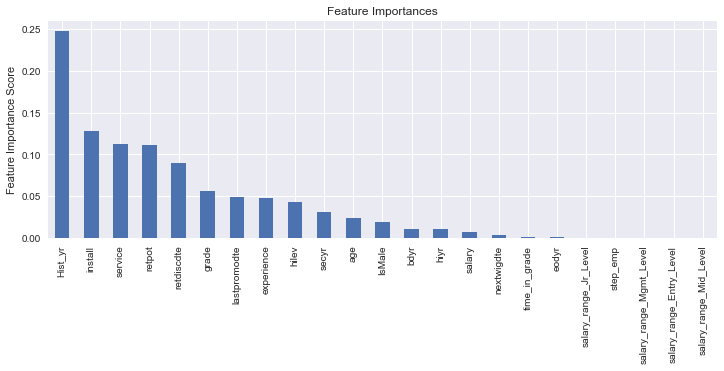

In [180]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

Describe what you see above ^

### Tune the parameters

In [191]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
param_test1 = {'n_estimators':[50,60,70,80,90,100, 120, 140, 160]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8, max_features='sqrt', subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [50, 60, 70, 80, 90, 100, 120, 140, 160]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [192]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.68594, std: 0.10479, params: {'n_estimators': 50},
  mean: 0.69263, std: 0.10364, params: {'n_estimators': 60},
  mean: 0.69960, std: 0.10036, params: {'n_estimators': 70},
  mean: 0.70204, std: 0.10005, params: {'n_estimators': 80},
  mean: 0.70689, std: 0.09794, params: {'n_estimators': 90},
  mean: 0.71098, std: 0.09597, params: {'n_estimators': 100},
  mean: 0.71966, std: 0.09645, params: {'n_estimators': 120},
  mean: 0.72447, std: 0.09270, params: {'n_estimators': 140},
  mean: 0.72772, std: 0.09220, params: {'n_estimators': 160}],
 {'n_estimators': 160},
 0.72771882513631858)

10 Points - You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

# Appendix